DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


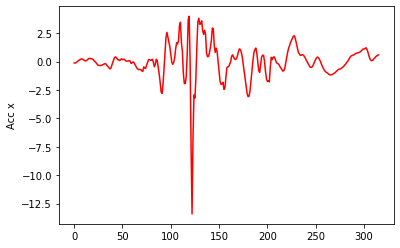

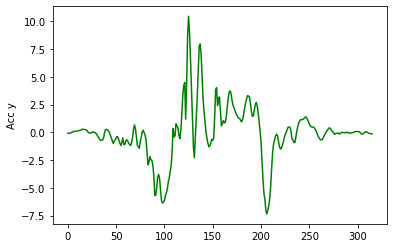

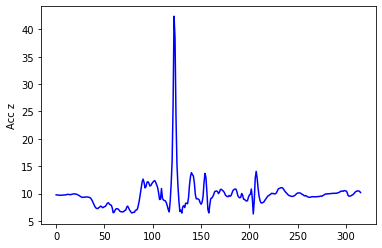

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

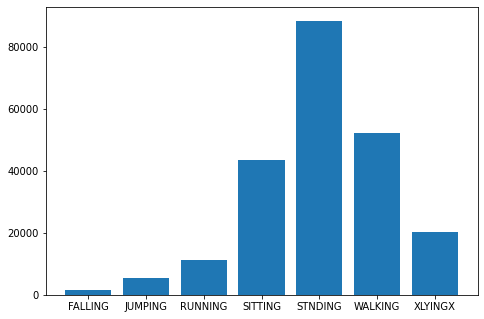

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
from data_transformation import data_normalization
X_visual_norm = data_normalization(X_data[:20])

2021-08-29 16:37:33.390967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-29 16:37:33.391114: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Text(0.5, 1.0, 'Norm Acc 1')

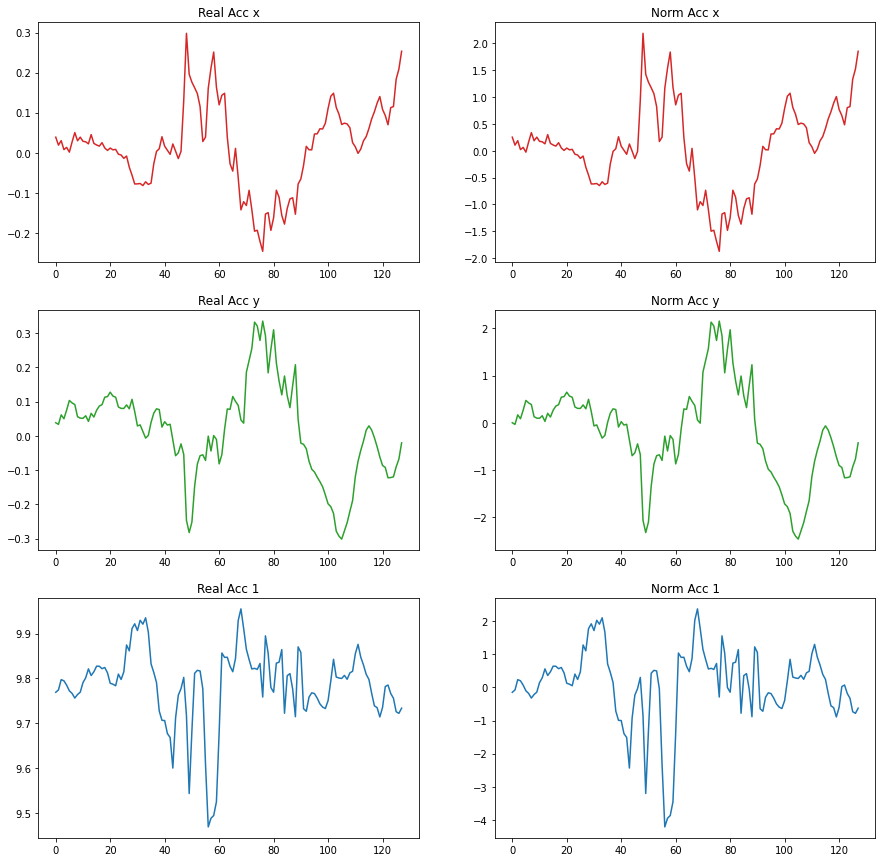

In [12]:
measure = 5
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_data[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_visual_norm[measure,:,0], 'tab:red')
axs[0, 1].set_title('Norm Acc x')

axs[1, 0].plot(X_data[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_visual_norm[measure,:,1], 'tab:green')
axs[1, 1].set_title('Norm Acc y')

axs[2, 0].plot(X_data[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_visual_norm[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Norm Acc 1')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [14]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_acc_norm = X_train[:,:,:3]
#X_acc_norm = X_acc_norm.reshape((X_acc_norm.shape[0], X_acc_norm.shape[1] * X_acc_norm.shape[2]))
#X_acc_norm = scaler.fit_transform(X_acc_norm)
#X_acc_norm = X_acc_norm.reshape((-1, 128, 3))
##
#scaler = MinMaxScaler()
#X_gyro_norm = X_train[:,:,3:]
#X_gyro_norm = X_gyro_norm.reshape((X_gyro_norm.shape[0], X_gyro_norm.shape[1] * X_gyro_norm.shape[2]))
#X_gyro_norm = scaler.fit_transform(X_gyro_norm)
#X_gyro_norm = X_gyro_norm.reshape((-1, 128, 3))
#
#X_train = np.concatenate([X_acc_norm, X_gyro_norm], axis=-1)
#print(X_train.shape)

Text(0.5, 1.0, 'Gyro z')

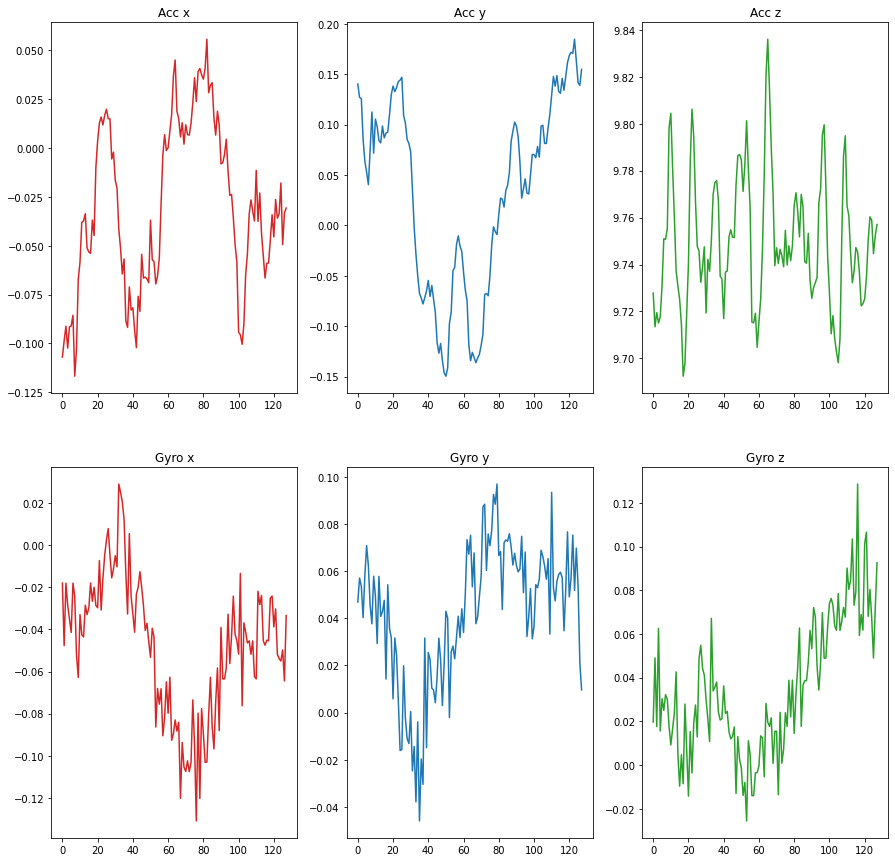

In [16]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [17]:
from data_transformation import data_normalization
from data_transformation import min_max_scaler

#X_train = min_max_scaler(X_train)
#X_test = min_max_scaler(X_test)

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

In [18]:
print(X_train.shape)

(155666, 128, 6)


Text(0.5, 1.0, 'Gyro z')

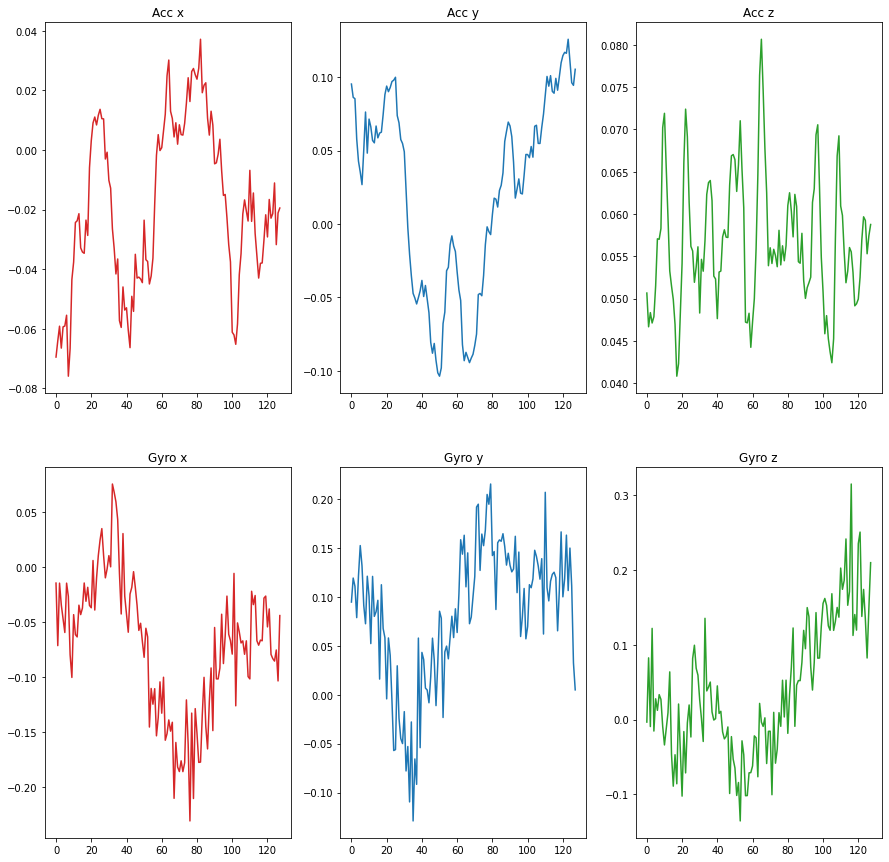

In [19]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [29]:
class LSRAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim, encoder, decoder, classifier, alpha=0.1, beta=1.0, **kwargs):
    super(LSRAE, self).__init__(**kwargs)
    self.latent_dim = latent_dim
    self.alpha = alpha
    self.beta = beta
    self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
    self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="rec_loss")
    self.kl_loss_tracker = tf.keras.metrics.Mean(name="pred_loss")
    self.encoder = encoder
    self.decoder = decoder
    self.classifier = classifier
    
  @property
  def metrics(self):
      return [
          self.total_loss_tracker,
          self.reconstruction_loss_tracker,
          self.kl_loss_tracker,
      ]

  def encode(self, x):
    return self.encoder(x)

  def decode(self, z):
    logits = self.decoder(z)
    preds = self.classifier(z)
    return logits, preds

  def predict(self, x):
      codings = self.encode(x)
      return self.classifier(codings)
  
  def call(self, x):
    codings = self.encode(x)
    return self.decoder(codings)

  def train_step(self, data):
    x, y = data
    with tf.GradientTape() as tape:
        codings = self.encode(x)
        logits, preds = self.decode(codings)
        pred_loss = tf.keras.losses.sparse_categorical_crossentropy(y, preds)
        pred_loss = tf.reduce_mean(pred_loss)
        r_loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(x, logits), axis=1)
        r_loss = tf.reduce_mean(r_loss)
        loss = self.alpha * r_loss + self.beta * pred_loss
        
    gradients = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
    self.total_loss_tracker.update_state(loss)
    self.reconstruction_loss_tracker.update_state(r_loss)
    self.kl_loss_tracker.update_state(pred_loss)
    return {
        "loss": self.total_loss_tracker.result(),
        "rec_loss": self.reconstruction_loss_tracker.result(),
        "pred_loss": self.kl_loss_tracker.result(),
    }
    
  def test_step(self, data):
    x, y = data
    codings = self.encode(x)
    logits, preds = self.decode(codings)
    pred_loss = tf.keras.losses.sparse_categorical_crossentropy(y, preds)
    pred_loss = tf.reduce_mean(pred_loss)
    r_loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(x, logits), axis=1)
    r_loss = tf.reduce_mean(r_loss)
    loss = self.alpha * r_loss + self.beta * pred_loss    
    self.total_loss_tracker.update_state(loss)
    self.reconstruction_loss_tracker.update_state(r_loss)
    self.kl_loss_tracker.update_state(pred_loss)
    return {
        "loss": self.total_loss_tracker.result(),
        "rec_loss": self.reconstruction_loss_tracker.result(),
        "pred_loss": self.kl_loss_tracker.result(),
    }

In [30]:
encoded_space_dim = 64


encoder = tf.keras.models.Sequential(
        [
            layer.InputLayer(input_shape=(128, 6)),
            layer.Dropout(0.4),
            layer.Conv1D(filters=32, kernel_size=9, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=64, kernel_size=7, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=128, kernel_size=5, strides=2, activation='relu', padding='same'),
            layer.Conv1D(filters=256, kernel_size=3, strides=2, activation='relu', padding='same'),
            layer.Flatten(),
            layer.Dropout(rate=0.2),
            layer.Dense(encoded_space_dim),
        ], name="encoder"
    )

decoder = tf.keras.models.Sequential(
        [
            layer.InputLayer(input_shape=(encoded_space_dim)),
            layer.Dense(units=8*256, activation='relu'),
            layer.Reshape((8, 256)),
            layer.Conv1DTranspose(filters=128, kernel_size=3, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layer.Conv1DTranspose(filters=6, kernel_size=3, strides=2, padding='same'),
        ], name="decoder"
    )

classifier = tf.keras.models.Sequential(
        [
            layer.Dense(512),
            layer.Dense(num_labels, activation='softmax'),
        ], name="classifier"
    )


In [54]:
#from models import LSRAE

autoencoder = LSRAE(encoded_space_dim, encoder, decoder, classifier, alpha=0.1, beta=1.0)

autoencoder.predict(X_train[:10]).shape
autoencoder(X_train[:10]).shape

TensorShape([10, 128, 6])

In [55]:
autoencoder.summary()

Model: "lsrae_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 64)                286944    
_________________________________________________________________
decoder (Sequential)         (None, 128, 6)            262950    
_________________________________________________________________
classifier (Sequential)      (None, 7)                 36871     
Total params: 586,771
Trainable params: 586,765
Non-trainable params: 6
_________________________________________________________________


In [56]:
autoencoder.encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 128, 6)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 32)            1760      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 32, 64)            14400     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 16, 128)           41088     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 256)            98560     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0   

In [57]:
autoencoder.decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              133120    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 256)            0         
_________________________________________________________________
conv1d_transpose_4 (Conv1DTr (None, 16, 128)           98432     
_________________________________________________________________
conv1d_transpose_5 (Conv1DTr (None, 32, 64)            24640     
_________________________________________________________________
conv1d_transpose_6 (Conv1DTr (None, 64, 32)            6176      
_________________________________________________________________
conv1d_transpose_7 (Conv1DTr (None, 128, 6)            582       
Total params: 262,950
Trainable params: 262,950
Non-trainable params: 0
_____________________________________________________

In [58]:
autoencoder.classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 3591      
Total params: 36,871
Trainable params: 36,871
Non-trainable params: 0
_________________________________________________________________


In [59]:
optimizer = tf.keras.optimizers.Adam()

autoencoder.compile(optimizer=optimizer)

In [60]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = autoencoder.fit(X_train, y_train,
                epochs=5,
                shuffle=True,
                batch_size=128,
                validation_split=0.2,
                callbacks=[callback]
                )

Epoch 1/5
973/973 [==============================] - 20s 20ms/step - loss: 3.6661 - rec_loss: 31.1817 - pred_loss: 0.5169 - val_loss: 3.6803 - val_rec_loss: 32.3467 - val_pred_loss: 0.4457
Epoch 2/5
973/973 [==============================] - 21s 22ms/step - loss: 3.4421 - rec_loss: 30.2296 - pred_loss: 0.4119 - val_loss: 3.5496 - val_rec_loss: 31.3391 - val_pred_loss: 0.4157
Epoch 3/5
973/973 [==============================] - 21s 21ms/step - loss: 3.2468 - rec_loss: 29.3199 - pred_loss: 0.3394 - val_loss: 3.4690 - val_rec_loss: 30.9279 - val_pred_loss: 0.3762
Epoch 4/5
973/973 [==============================] - 21s 21ms/step - loss: 3.1802 - rec_loss: 28.6654 - pred_loss: 0.2911 - val_loss: 3.3239 - val_rec_loss: 30.4323 - val_pred_loss: 0.2807
Epoch 5/5
973/973 [==============================] - 20s 21ms/step - loss: 3.0065 - rec_loss: 28.0835 - pred_loss: 0.2582 - val_loss: 3.2709 - val_rec_loss: 30.1153 - val_pred_loss: 0.2594


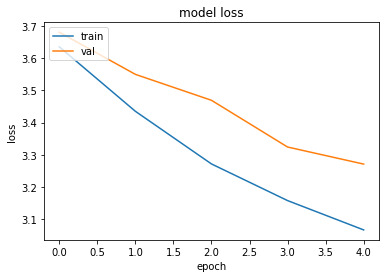

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
X_trans = autoencoder(X_train[:1000])

WALKING


Text(0.5, 1.0, 'Pred Acc 1')

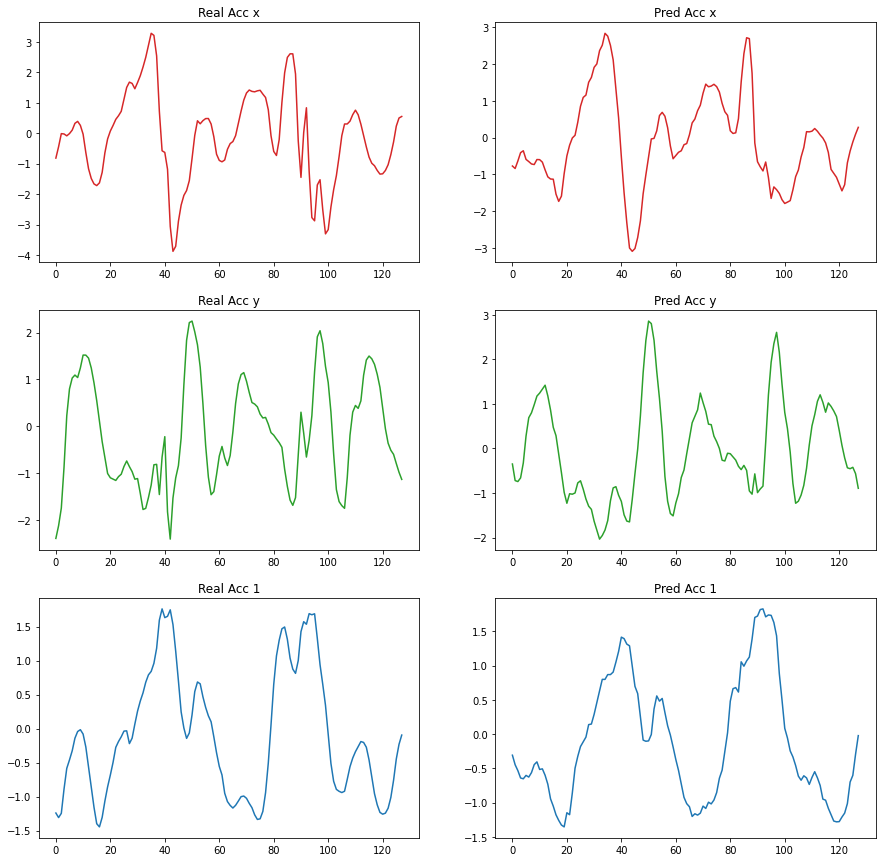

In [79]:
measure = 25
label_measured = y_train[measure]
print(le.inverse_transform([label_measured])[0])
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')

In [80]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = autoencoder.encode(sample)
    
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)

In [81]:
print(np.array(encoded_samples).shape)

(10000, 64)


In [82]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [83]:
labels = le.inverse_transform(labels) 

In [84]:
import plotly.express as px
px.scatter(x=tsne[:,0], y=tsne[:,1], color=labels, opacity=0.7)

In [85]:
y_pred = autoencoder.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [86]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_pred, y_test)

In [87]:
np.trace(conf_mat) / np.sum(conf_mat)

0.9082814959154613

In [88]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.65329513 0.86616635 0.98554291 0.90243286 0.9178927  0.96034012
 0.73838705]
Recall score:  [0.53146853 0.82934132 0.96245119 0.82353845 0.93138807 0.98938551
 0.7993448 ]


In [89]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.6532951289398281 Recall 0.5314685314685315
JUMPING: Precision 0.866166353971232 Recall 0.8293413173652695
RUNNING: Precision 0.9855429098738849 Recall 0.9624511865425053
SITTING: Precision 0.9024328647192524 Recall 0.8235384497195974
STNDING: Precision 0.9178927032248477 Recall 0.9313880720802232
WALKING: Precision 0.9603401191658392 Recall 0.9893855105825181
XLYINGX: Precision 0.7383870479648964 Recall 0.7993447993447993


In [90]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.5861182519280206
JUMPING: F1-score 0.8473539308657081
RUNNING: F1-score 0.9738601823708207
SITTING: F1-score 0.8611825192802055
STNDING: F1-score 0.9245911455409603
WALKING: F1-score 0.974646467827785
XLYINGX: F1-score 0.7676577001730376


In [91]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

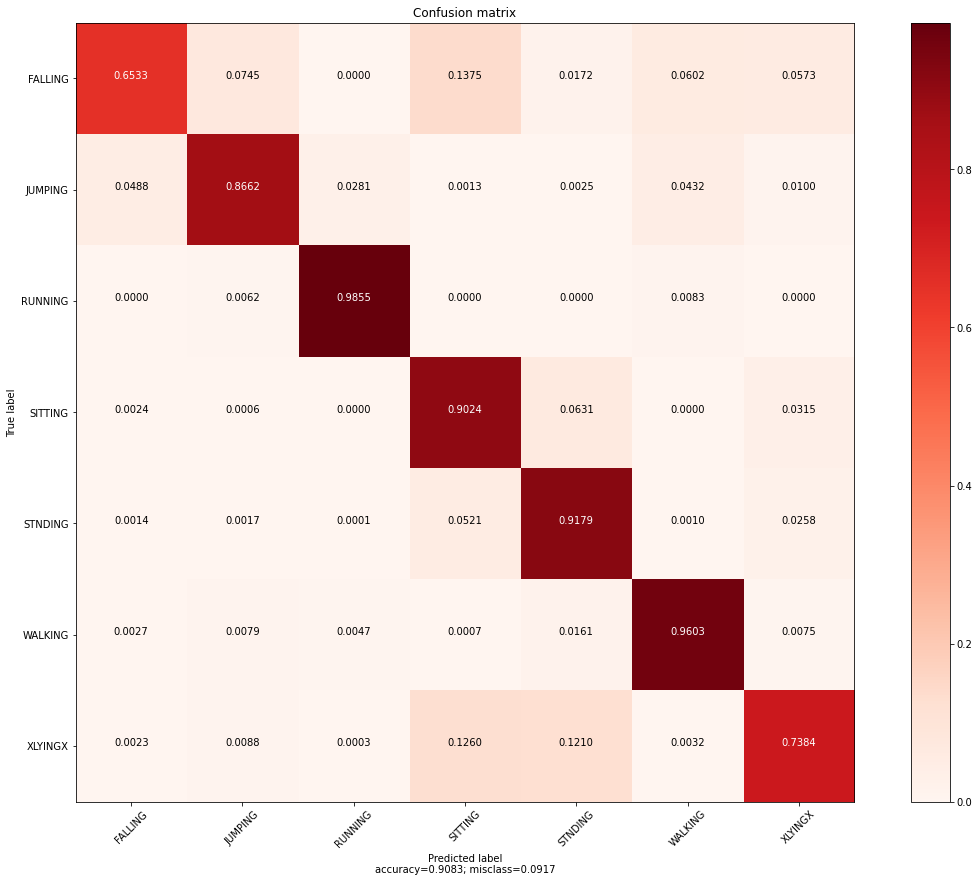

In [92]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)